In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten
from tensorflow import keras as k
import tensorflow as t
from keras.losses import sparse_categorical_crossentropy
import itertools

In [44]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [45]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [46]:
df.isnull().values.any()

False

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [48]:
df.shape

(2111, 17)

In [49]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [51]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [52]:
df["Age"].describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

In [53]:
df["Age"].median()

22.77789

C:\Users\WRASH-TECH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NObeyesdad', ylabel='count'>

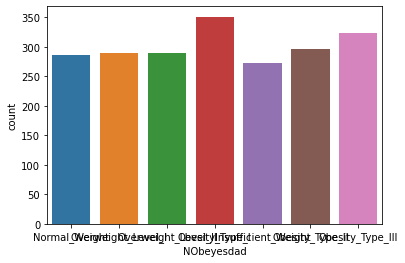

In [54]:
sns.countplot(df['NObeyesdad'], label='count obesity')

In [55]:
def plot_distribution(dataset, feature):

    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()


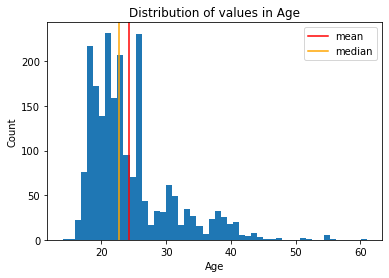

In [56]:
plot_distribution(df, "Age")

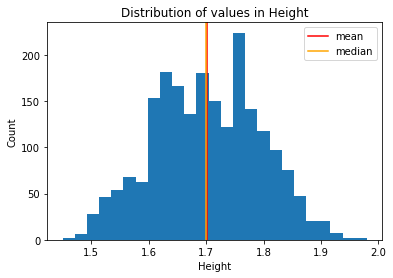

In [57]:

plot_distribution(df, "Height")


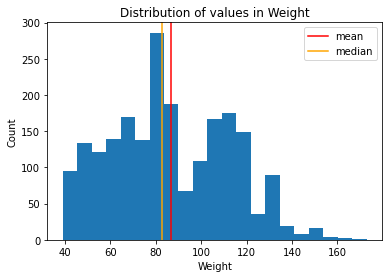

In [58]:
plot_distribution(df, "Weight")

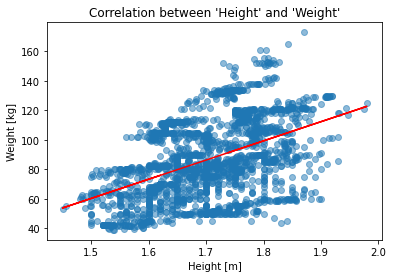

In [59]:
plt.scatter(df["Height"], df["Weight"], alpha = 0.5)
m, b = np.polyfit(df["Height"], df["Weight"], 1)
plt.plot(df["Height"], m * df["Height"] + b, color = "red")

plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between 'Height' and 'Weight'")
plt.show()

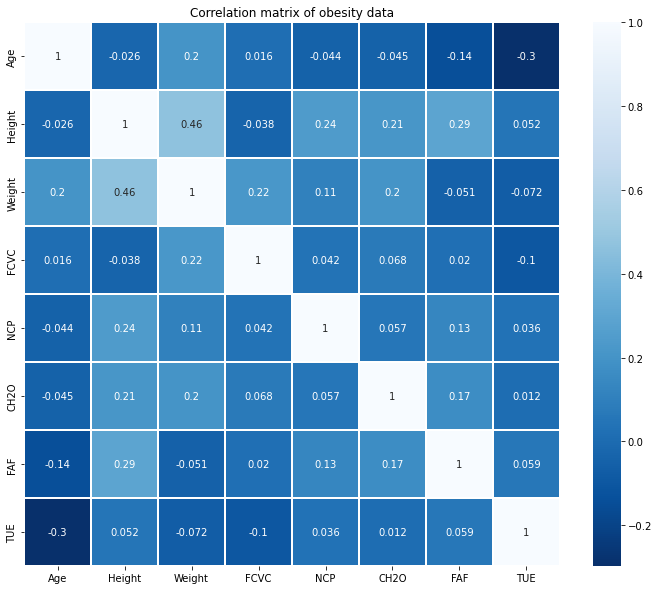

In [60]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(),
           annot = True,
           cmap = "Blues_r",
           linewidths = 2, 
           linecolor = "white")
plt.title("Correlation matrix of obesity data")
plt.show()

In [61]:
lb = LabelEncoder()
for col in df.columns:
    if df[col].dtype != np.number:
        df[col] = lb.fit_transform(df[col])
        

C:\Users\WRASH-~1\AppData\Local\Temp/ipykernel_5732/3690943652.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype != np.number:


In [62]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [80]:
x = df.drop(['NObeyesdad'], axis=1)
y = df['NObeyesdad']

In [81]:
# features scaling
scaler = StandardScaler()
x[x.columns]= scaler.fit_transform(x)

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [101]:
# building the model
model = Sequential()
model.add(Flatten())
model.add(Dense(64, input_dim=len(x.columns), kernel_initializer=k.initializers.random_normal
                (seed=13), activation="relu"))

model.add(Dense(128, activation="relu"))

model.add(Dense(7, activation="softmax"))



In [102]:
#compile the model
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [103]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
53/53 [==============================] - 1s 2ms/step - loss: 1.6946 - accuracy: 0.4194
Epoch 2/50
53/53 [==============================] - 0s 3ms/step - loss: 1.0689 - accuracy: 0.6191
Epoch 3/50
53/53 [==============================] - 0s 3ms/step - loss: 0.7605 - accuracy: 0.7299
Epoch 4/50
53/53 [==============================] - 0s 3ms/step - loss: 0.6074 - accuracy: 0.7921
Epoch 5/50
53/53 [==============================] - 0s 3ms/step - loss: 0.4776 - accuracy: 0.8507
Epoch 6/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.8803
Epoch 7/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3160 - accuracy: 0.9123
Epoch 8/50
53/53 [==============================] - 0s 3ms/step - loss: 0.2632 - accuracy: 0.9206
Epoch 9/50
53/53 [==============================] - 0s 3ms/step - loss: 0.2220 - accuracy: 0.9372
Epoch 10/50
53/53 [==============================] - 0s 3ms/step - loss: 0.1934 - accuracy: 0.9485
Epoch 11/50
53/53 [

In [104]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.1419 - accuracy: 0.9669


[0.14192920923233032, 0.9669030904769897]

In [105]:
model.save('modelObes.h5')

Text(0.5, 0, 'epoch')

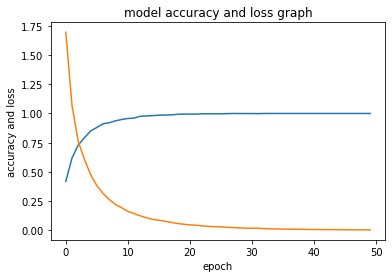

In [106]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss graph')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [109]:
new_model = t.keras.models.load_model('modelObes.h5', custom_objects={'sparse_categorical_crossentropy':sparse_categorical_crossentropy})

In [110]:
y_pred = new_model.predict(x_test)

In [112]:
y_pred[:5]

array([[9.9894708e-01, 1.0529557e-03, 1.3676956e-33, 0.0000000e+00,
        2.1420632e-34, 1.1460448e-13, 1.8431289e-23],
       [0.0000000e+00, 0.0000000e+00, 6.7986247e-07, 5.8854812e-07,
        9.9999869e-01, 3.6549697e-30, 1.1163922e-15],
       [9.9252796e-01, 7.4720932e-03, 1.5524210e-29, 7.3899964e-34,
        2.0344874e-28, 1.0008279e-11, 1.2646122e-19],
       [9.9980086e-01, 1.9920195e-04, 2.6418756e-28, 1.1984323e-30,
        5.4213795e-27, 9.4281354e-13, 9.7355710e-23],
       [6.6142973e-05, 6.5263629e-01, 1.0043063e-11, 5.3470758e-18,
        9.7256662e-15, 3.4726763e-01, 2.9951816e-05]], dtype=float32)

In [113]:
preds = np.argmax(y_pred, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(y_pred[:,1])    

In [115]:
preds[:5]

array([0, 4, 0, 0, 1], dtype=int64)

In [119]:

print(classification_report(y_test, preds, digits=7))

              precision    recall  f1-score   support

           0  0.9180328 1.0000000 0.9572650        56
           1  0.9482759 0.8870968 0.9166667        62
           2  0.9871795 0.9871795 0.9871795        78
           3  0.9827586 0.9827586 0.9827586        58
           4  1.0000000 1.0000000 1.0000000        63
           5  0.9454545 0.9285714 0.9369369        56
           6  0.9800000 0.9800000 0.9800000        50

    accuracy                      0.9669031       423
   macro avg  0.9659573 0.9665152 0.9658295       423
weighted avg  0.9672539 0.9669031 0.9666871       423



In [128]:
cm = confusion_matrix(y_test, preds)
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print("True Postive = " , TP)
print("True Negative = " , TN)
print("False Postive = " , FP)
print("False Negative = " , FN)
print("Testing Accuracy = ", (TP + TN)/(TP + TN + FP + FN))


print("Using Accuracy Score", accuracy_score(y_test, preds))

True Postive =  56
True Negative =  55
False Postive =  0
False Negative =  5
Testing Accuracy =  0.9568965517241379
Using Accuracy Score 0.966903073286052


In [122]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

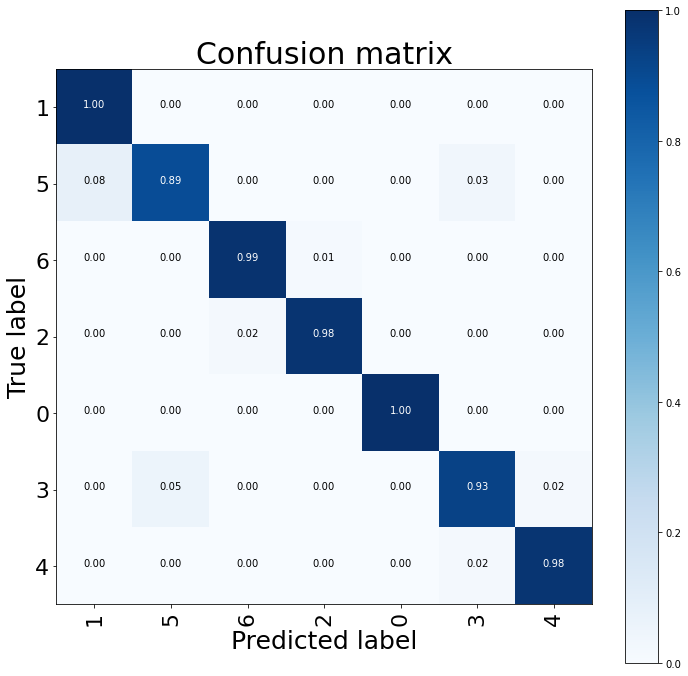

In [125]:
plt.figure(figsize=(12,12))
plot_confusion_matrix(cm, classes=df['NObeyesdad'].unique(), title="Confusion matrix")
plt.show()